# Political vs Non-political Classifier

In [1]:
import requests
import json
import datetime
import pandas as pd
from datetime import timedelta
import mwclient
from collections import OrderedDict
import time
import csv
import bs4
import os
from bs4 import BeautifulSoup as BS
from urllib.parse import quote
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

### Classification for Identifying politic related articles

**1:** Accumulating text of the first paragraphs of political Wikipedia articles

*Based on the elections listed in https://en.wikipedia.org/wiki/List_of_elections_in_2024 and https://en.wikipedia.org/wiki/List_of_elections_in_2023 focused on the primarily English speaking countries: USA, Canada, UK, Australia (Added India elections too after seeing top articles in 2024)*

*Added articles in the politics section of https://wikimediafoundation.org/news/2024/12/03/announcing-english-wikipedias-most-popular-articles-of-2024/since there are several articles listed in relation to politics, primarily the US election*

In [2]:
political = """Kamala Devi Harris (/ˈkɑːmələ ˈdeɪvi/ ⓘ KAH-mə-lə DAY-vee;[1] born October 20, 1964) is an American politician and attorney who served as the 49th vice president of the United States from 2021 to 2025 under President Joe Biden. She is the first female, first African American, and first Asian American U.S. vice president, and the highest-ranking female and Asian American official in U.S. history. Harris represented California in the U.S. Senate from 2017 to 2021 and was the attorney general of California from 2011 to 2017. A member of the Democratic Party, she was the party's nominee in the 2024 presidential election.
Donald John Trump (born June 14, 1946) is an American politician, media personality, and businessman who is the 47th president of the United States. A member of the Republican Party, he served as the 45th president from 2017 to 2021. Born into a wealthy family in New York City, Trump graduated from the University of Pennsylvania in 1968 with a bachelor's degree in economics. He became the president of his family's real estate business in 1971, renamed it the Trump Organization, and began acquiring and building skyscrapers, hotels, casinos, and golf courses. He also launched side ventures, many licensing the Trump name, and filed for six business bankruptcies in the 1990s and 2000s. From 2004 to 2015, he hosted the reality television show The Apprentice, bolstering his fame as a billionaire. Presenting himself as a political outsider, Trump won the 2016 presidential election against Democratic Party nominee Hillary Clinton.
The Democratic Party is a liberal political party in the United States. Sitting on the center to center-left of the political spectrum, it is the world's oldest active political party, having been founded in 1828. Its main rival is the conservative Republican Party, and since the 1850s both have dominated American politics. It initially supported Jacksonian democracy, agrarianism, and geographical expansionism, while opposing a national bank and high tariffs. Democrats won six of the eight presidential elections from 1828 to 1856, losing twice to the Whigs. In 1860, the party split into Northern and Southern factions over slavery. The party remained dominated by agrarian interests, contrasting with Republican support for the big business of the Gilded Age. Democratic candidates won the presidency only twice[b] between 1860 and 1908 though they won the popular vote two more times in that period. During the Progressive Era, some factions of the party supported progressive reforms, with Woodrow Wilson being elected president in 1912 and 1916
The Republican Party, also known as the Grand Old Party (GOP), is a conservative and right-wing political party in the United States. It emerged as the main rival of the Democratic Party in the 1850s, and the two parties have dominated American politics since then. The Republican Party was founded in 1854 by anti-slavery activists opposing the Kansas–Nebraska Act and the expansion of slavery into U.S. territories. It rapidly gained support in the North, drawing in former Whigs and Free Soilers. Abraham Lincoln's election in 1860 led to the secession of Southern states and the outbreak of the American Civil War. Under Lincoln and a Republican-controlled Congress, the party led efforts to preserve the Union, defeat the Confederacy, and abolish slavery. During the Reconstruction era, Republicans sought to extend civil rights protections to freedmen, but by the late 1870s the party shifted its focus toward business interests and industrial expansion. In the late 19th and early 20th centuries, it dominated national politics, promoting protective tariffs, infrastructure development, and laissez-faire economic policies, while navigating internal divisions between progressive and conservative factions. The party's support declined during the Great Depression, as the New Deal coalition reshaped American politics. Republicans returned to national power with the 1952 election of Dwight D. Eisenhower, whose moderate conservatism reflected a pragmatic acceptance of many New Deal-era programs.
The 2024 British Columbia general election was held on October 19, 2024, to elect 93 members (MLAs) of the Legislative Assembly to serve in the 43rd parliament of the Canadian province of British Columbia. The election was the first to be held since a significant redistribution of electoral boundaries was finalised in 2023. The Legislative Assembly also expanded in size from 87 seats to 93 seats. The election saw a broad political realignment in British Columbia;[2] amid a resurgence for the Conservative Party of British Columbia, the official opposition BC United (formerly the BC Liberals) withdrew from the race a little over a month before the election to avoid splitting the vote. BC United formally endorsed the Conservatives, with several BC United candidates either defecting to the Conservatives or standing as independent or unaligned candidates; this marked the party's first absence from a provincial election since 1900.
The 2024 New Brunswick general election was held on October 21, 2024, where 49 members were elected to the Legislative Assembly of New Brunswick. It was formally called upon the dissolution of the 60th New Brunswick Legislature on September 19, 2024.[2] The incumbent Progressive Conservative Party of New Brunswick (PC) government, led by Premier Blaine Higgs since 2018, sought re-election to a third consecutive term. The party was defeated by the New Brunswick Liberal Association, led by Susan Holt, with them set to form a majority government in a landslide victory. Higgs was defeated in his own riding of Quispamsis, the first time since 1987 that a sitting New Brunswick Premier lost in their own riding. Upon taking office, Holt became the first woman premier of New Brunswick
The 2024 Nova Scotia general election was held on November 26, 2024, to elect members to the 65th General Assembly of Nova Scotia. The election was held under first-past-the-post voting. The incumbent Progressive Conservative Association of Nova Scotia (PC) government, led by Premier Tim Houston since 2021, called a snap election and won a second consecutive majority government. It is the first time since 1984 that the PCs won over half of the popular vote, and a supermajority (i.e., greater than two-thirds) of seats in the General Assembly means that it can alter procedural rules without the collaboration of the other parties.[1] In raw numbers (but not proportion of seats), this is the largest government caucus they have ever had. The Nova Scotia New Democratic Party, led by Claudia Chender, formed the official opposition for the first time since 2006, though they narrowly came in third in votes. The Nova Scotia Liberal Party, led by Zach Churchill, recorded its worst result in party history.
The 2024 Saskatchewan general election was held on October 28, 2024, to elect members of the Legislative Assembly of Saskatchewan. The incumbent Saskatchewan Party government, led by Premier Scott Moe since 2018, sought re-election to a fifth consecutive term. The Saskatchewan Party's primary opponent, the Saskatchewan New Democratic Party (NDP) led by Carla Beck, sought to lead the NDP to its first government since 2007. This was the first general election to feature the Saskatchewan United Party (SUP).
The 2024 United States state legislative elections were held on November 5, 2024, for 85 state legislative chambers in 44 states. Across the fifty states, approximately 65 percent of all upper house seats and 85 percent of all lower house seats were up for election. Nine legislative chambers in the five permanently inhabited U.S. territories and the federal district of Washington, D.C., also held elections. The elections take place concurrently with several other federal, state, and local elections, including the presidential election, U.S. Senate elections, U.S. House elections, and gubernatorial elections.
The 2024 United States Senate elections were held on November 5, 2024. Regularly scheduled elections were held for 33 out of the 100 seats in the U.S. Senate,[4][5] and special elections were held in California[6] and Nebraska.[7] U.S. senators are divided into three classes whose six-year terms are staggered so that a different class is elected every two years.[8] Class 1 senators faced election in 2024.[9] Republicans flipped four Democratic-held seats, regaining a Senate majority for the first time in four years, and the most gains for either party since 2014. Republicans successfully defended all of their own seats for the first time since 2014. This was the first time since 1980 that Republicans flipped control of a chamber of Congress in a presidential year.
Presidential elections were held in the United States on November 5, 2024. The Republican Party's ticket—Donald Trump, who served as the 45th president of the United States from 2017 to 2021, and JD Vance, a U.S. senator from Ohio—defeated the Democratic Party's ticket—Kamala Harris, the incumbent U.S. vice president, and Tim Walz, the incumbent governor of Minnesota.
The 2024 United States House of Representatives elections were held on November 5, 2024, to elect the 435 representatives of the United States House of Representatives, as well as 6 non-voting delegates from the District of Columbia and inhabited U.S. territories. The elections were held together with other federal, state, and local elections, including the U.S. presidential election and elections to the Senate, as part of the 2024 United States general election. The winners of this election serve in the 119th United States Congress, with seats apportioned among states based on the 2020 United States census.
United States gubernatorial elections were held on November 5, 2024, in 11 states and two territories. The previous gubernatorial elections for this group of states took place in 2020, except in New Hampshire and Vermont, where governors only serve two-year terms and elected their governors in 2022. In addition to state gubernatorial elections, the territories of American Samoa and Puerto Rico held elections for their governors. This was also the first time since 1988 that a Republican nominee won the gubernatorial election in American Samoa and also the first time since 1996 that an incumbent governor there lost re-election.
The 2024 Queensland state election was held on 26 October 2024 to elect all members to the Legislative Assembly of Queensland pursuant to the Constitution (Fixed Term Parliament) Amendment Act 2015. As a result of the 2016 Queensland term length referendum, the term of the parliament will run for four years
The 2024 Australian Capital Territory election was held on 19 October 2024 to elect all 25 members of the unicameral ACT Legislative Assembly.[1] The centre-left Labor Party, led by Chief Minister Andrew Barr, which had been in government in the territory since the 2001 election, and in coalition with the progressive Greens since 2012, sought to win a seventh consecutive term in office. They were challenged by the centre-right Liberal Party, led by Opposition Leader Elizabeth Lee, as well as several minor parties and independent candidates. Lee is the first Asian Australian leader of a state or territory opposition
The 2024 Northern Territory general election was held on 24 August 2024 to elect all 25 members of the Legislative Assembly in the unicameral Northern Territory Parliament. Members were elected through full preferential instant-runoff voting in single-member electorates. The election was conducted by the Northern Territory Electoral Commission (NTEC).
The 2024 Tasmanian state election was held on 23 March 2024 to elect all 35 members of the Tasmanian House of Assembly. The House of Assembly uses the proportional Hare-Clark system of voting, with the 35 members elected from five seven-member constituencies. The Assembly's size was increased from 25 to 35 seats at this election, under the provisions of the Expansion of House of Assembly Act 2022, assented to in December 2022.[2][3] The election was conducted by the Tasmanian Electoral Commission. Elections for the 15-seat single-member district upper house, known as the Legislative Council, which use full-preference instant-runoff voting, are staggered each year and conducted separately from lower house state elections.
The 2024 United Kingdom general election was held on Thursday, 4 July 2024 to elect all 650 members of the House of Commons. The opposition Labour Party, led by Keir Starmer, won a landslide victory over the governing Conservative Party under Prime Minister Rishi Sunak, ending 14 years of Conservative government
The 2024 London Assembly election was held on 2 May 2024 to elect the members of the London Assembly. It took place on the same day as the 2024 London mayoral election, local elections across England and Wales and one parliamentary by-election.
The 2024 London mayoral election was held on 2 May 2024 to elect the next mayor of London. It took place simultaneously with elections to the London Assembly, some local council by-elections in London and regular local elections elsewhere in England and Wales. Following the Elections Act 2022, voting in this election took place under the first-past-the-post system for the first time, replacing the supplementary vote system. The result of the election was announced on 4 May 2024
The 2024 United Kingdom local elections took place on 2 May 2024 to choose 2,658 councillors on 107 councils in England, 11 directly elected mayors in England, the 25 members of the London Assembly, and 37 police and crime commissioners in England and Wales. The 2024 Blackpool South parliamentary by-election was held on the same day.[5] These local elections were the last set of routine elections before the 2024 general election.
South Wales state election was held on 25 March 2023 to elect the 58th Parliament of New South Wales, including all 93 seats in the Legislative Assembly and 21 of the 42 seats in the Legislative Council. The election was conducted by the New South Wales Electoral Commission (NSWEC). The incumbent minority Liberal/National Coalition government, led by Premier Dominic Perrottet, sought to win a fourth successive four-year term in office, but was defeated by the opposition Labor Party, led by Opposition Leader Chris Minns. The Greens, the Shooters, Fishers and Farmers Party, other minor parties and several independents also contested the election.
The 2023 United States state legislative elections were held on November 7, 2023, for eight state legislative chambers in four states.[1] These off-year elections coincided with other state and local elections, including gubernatorial elections in three states. Special elections were held throughout the year in several states.
United States gubernatorial elections were held on November 7, 2023, in the states of Kentucky and Mississippi, with an election having occurred in Louisiana on October 14. These elections form part of the 2023 United States elections. The last regular gubernatorial elections for all three states were in 2019.
The 2023 Northwest Territories general election was held on November 14, 2023.[1] Nineteen members were elected to the 20th Northwest Territories Legislative Assembly.[2] The Assembly is run on a consensus government system, in which all MLAs sit as independents and are not organized into political parties.
The 2023 Manitoba general election was held on October 3, 2023, to elect 57 members to the Legislative Assembly of Manitoba. The New Democratic Party of Manitoba, led by Wab Kinew, formed a majority government, defeating the two-term Progressive Conservative government. Following the election, Kinew became the first First Nations person to become premier of a Canadian province.
The 2023 Alberta general election was held on May 29, 2023.[1] Voters elected the members of the 31st Alberta Legislature. The United Conservative Party under Danielle Smith, the incumbent Premier of Alberta, was re-elected to a second term with a reduced majority.[2] Across the province, 1,763,441 valid votes were cast in the election
The 2023 Prince Edward Island general election was held to elect the members of the 67th General Assembly of Prince Edward Island on 3 April 2023.[2] The election normally required by 2 October under Prince Edward Island's fixed election date legislation was called early by Premier Dennis King at his nomination meeting on 6 March
The United Kingdom of Great Britain and Northern Ireland, commonly known as the United Kingdom (UK) or Britain,[m] is a country in Northwestern Europe, off the coast of the continental mainland. It comprises England, Scotland, Wales and Northern Ireland,[n] with a population of over 69 million in 2024. The UK includes the island of Great Britain, the north-eastern part of the island of Ireland, and most of the smaller islands within the British Isles, covering 94,354 square miles (244,376 km2).[f] It shares a land border with the Republic of Ireland and is otherwise surrounded by the Atlantic Ocean, the North Sea, the English Channel, the Celtic Sea and the Irish Sea, while maintaining sovereignty over the British Overseas Territories. The capital and largest city of both England and the UK is London; Edinburgh, Cardiff and Belfast are the national capitals of Scotland, Wales and Northern Ireland.
Britain has been inhabited since the Neolithic. In AD 43 the Roman conquest of Britain began. The Roman departure between 383 and 410 was followed by Anglo-Saxon settlement beginning around 450. In 1066 the Normans conquered England. After the Wars of the Roses, the Kingdom of England began to flourish, resulting in the 16th-century annexation of Wales and the establishment of the British Empire. Over the 17th century the role of the British monarchy was reduced, particularly as a result of the English Civil War. In 1707 the Kingdom of England and the Kingdom of Scotland united under the Treaty of Union to create the Kingdom of Great Britain. In the Georgian era the office of prime minister became established. The Acts of Union 1800 incorporated the Kingdom of Ireland to create the United Kingdom of Great Britain and Ireland in 1801. Most of Ireland seceded from the UK in 1922 as the Irish Free State, and the Royal and Parliamentary Titles Act 1927 created the present United Kingdom.
The United States of America (USA), also known as the United States (U.S.) or America, is a country primarily located in North America. It is a federal republic of 50 states and a federal capital district, Washington, D.C. The 48 contiguous states border Canada to the north and Mexico to the south, with the semi-exclave of Alaska in the northwest and the archipelago of Hawaii in the Pacific Ocean. The United States also asserts sovereignty over five major island territories and various uninhabited islands in Oceania and the Caribbean.[j] It is a megadiverse country, with the world's third-largest land area[c] and third-largest population, exceeding 340 million.[k]
Paleo-Indians first migrated from North Asia to North America over 12,000 years ago, and formed various civilizations. Spanish colonization established Spanish Florida in 1513, the first European colony in what is now the continental United States. British colonization followed with the 1607 settlement of Virginia, the first of the Thirteen Colonies. Enslavement of Africans was practiced in all colonies by 1770 and supplied most of the labor for the Southern Colonies' plantation economy. Clashes with the British Crown over taxation and lack of parliamentary representation sparked the American Revolution, leading to the Declaration of Independence on July 4, 1776. Victory in the 1775–1783 Revolutionary War brought international recognition of U.S. sovereignty and fueled westward expansion, dispossessing native inhabitants. As more states were admitted, a North–South division over slavery led the Confederate States of America to attempt secession and fight the Union in the 1861–1865 American Civil War. With the United States' victory and reunification, slavery was abolished nationally. By 1900, the country had established itself as a great power, a status solidified after its involvement in World War I. Following Japan's attack on Pearl Harbor in 1941, the U.S. entered World War II. Its aftermath left the U.S. and the Soviet Union as rival superpowers, competing for ideological dominance and international influence during the Cold War. The Soviet Union's collapse in 1991 ended the Cold War, leaving the U.S. as the world's sole superpower.
Canada[a] is a country in North America. Its ten provinces and three territories extend from the Atlantic Ocean to the Pacific Ocean and northward into the Arctic Ocean, making it the second-largest country by total area, with the longest coastline of any country. Its border with the United States is the longest international land border. The country is characterized by a wide range of both meteorologic and geological regions. With a population of over 41 million, it has widely varying population densities, with the majority residing in its urban areas and large areas being sparsely populated. Canada's capital is Ottawa and its three largest metropolitan areas are Toronto, Montreal, and Vancouver.
Indigenous peoples have continuously inhabited what is now Canada for thousands of years. Beginning in the 16th century, British and French expeditions explored and later settled along the Atlantic coast. As a consequence of various armed conflicts, France ceded nearly all of its colonies in North America in 1763. In 1867, with the union of three British North American colonies through Confederation, Canada was formed as a federal dominion of four provinces. This began an accretion of provinces and territories resulting in the displacement of Indigenous populations, and a process of increasing autonomy from the United Kingdom. This increased sovereignty was highlighted by the Statute of Westminster, 1931, and culminated in the Canada Act 1982, which severed the vestiges of legal dependence on the Parliament of the United Kingdom.
Australia, officially the Commonwealth of Australia, is a country comprising the mainland of the Australian continent, the island of Tasmania and numerous smaller islands.[N 6] It has a total area of 7,688,287 km2 (2,968,464 sq mi), making it the sixth-largest country in the world and the largest in Oceania. Australia is the world's flattest and driest inhabited continent. It is a megadiverse country, and its size gives it a wide variety of landscapes and climates including deserts in the interior and tropical rainforests along the coast.
The ancestors of Aboriginal Australians began arriving from Southeast Asia 50,000 to 65,000 years ago, during the Last Glacial Period. By the time of British settlement, Aboriginal Australians spoke more than 250 distinct languages and had one of the oldest living cultures in the world.[17] Australia's written history commenced with Dutch exploration of most of the coastline in the 17th century. British colonisation began in 1788 with the establishment of the penal colony of New South Wales. By the mid-19th century, most of the continent had been explored by European settlers and five additional self-governing British colonies were established, each gaining responsible government by 1890. The colonies federated in 1901, forming the Commonwealth of Australia. This continued a process of increasing autonomy from the United Kingdom, highlighted by the Statute of Westminster Adoption Act 1942, and culminating in the Australia Acts of 1986.
Robert Francis Kennedy Jr. (born January 17, 1954), also known by his initials RFK Jr., is an American politician, environmental lawyer, author, conspiracy theorist, and anti-vaccine activist serving since 2025 as the 26th United States secretary of health and human services. A member of the prominent Kennedy family, he is a son of Senator and U.S. attorney general Robert F. Kennedy and a nephew of U.S. president John F. Kennedy.
Joseph Robinette Biden Jr.[a] (born November 20, 1942) is an American politician who served as the 46th president of the United States from 2021 to 2025. A member of the Democratic Party, he represented Delaware in the United States Senate from 1973 to 2009 and also served as the 47th vice president under President Barack Obama from 2009 to 2017.
Born in Scranton, Pennsylvania, Biden graduated from the University of Delaware in 1965 and the Syracuse University College of Law in 1968. He was elected to the New Castle County Council in 1970 and the U.S. Senate in 1972. As a senator, Biden chaired the Senate Judiciary Committee and Foreign Relations Committee. He drafted and led passage of the Violent Crime Control and Law Enforcement Act and the Violence Against Women Act. Biden also oversaw six U.S. Supreme Court confirmation hearings, including contentious hearings for Robert Bork and Clarence Thomas. He opposed the Gulf War in 1991 but voted in favor of the Iraq War Resolution in 2002. Biden ran unsuccessfully for the 1988 and 2008 Democratic presidential nominations. In 2008, Obama chose him as his running mate, and Biden was a close counselor to Obama as vice president. In the 2020 presidential election, Biden chose Kamala Harris as his running mate, and they defeated Republican incumbents Donald Trump and Mike Pence.
General elections were held in India from 19 April to 1 June 2024 in seven phases, to elect all 543 members of the Lok Sabha.[a] Votes were counted and the result was declared on 4 June to form the 18th Lok Sabha.[2][3] On 7 June 2024, Prime Minister Narendra Modi confirmed the support of 293 MPs to Droupadi Murmu, the president of India.[4] This marked Modi's third term as prime minister and his first time heading a coalition government,[5] with the Telugu Desam Party of Andhra Pradesh and Janata Dal (United) of Bihar emerging as two main allies.[6][7][8]
Presidential elections were held in the United States on November 3, 2020.[a] The Democratic ticket of former vice president Joe Biden and California junior senator Kamala Harris defeated the incumbent Republican president Donald Trump and vice president Mike Pence.[9] The election saw the highest voter turnout by percentage since 1900. Biden received more than 81 million votes,[10] the most votes ever cast for a presidential candidate in U.S. history.[11]
In a competitive primary that featured the most candidates for any political party in the modern era of American politics, Biden secured the Democratic presidential nomination. Biden's running mate, Harris, became the first African American, first Asian American, and third female[d] vice presidential nominee on a major party ticket. Trump easily secured re-nomination with only minor opposition in the Republican primaries. Jo Jorgensen secured the Libertarian presidential nomination with Spike Cohen as her running mate, and Howie Hawkins secured the Green presidential nomination with Angela Nicole Walker as his running mate.
Project 2025 (also known as the 2025 Presidential Transition Project)[3] is a political initiative published in April 2023 by the Heritage Foundation think tank to reshape the federal government of the United States and consolidate executive power in favor of right-wing policies.[4] It constitutes a policy document that suggests specific changes to the federal government, a personnel database for recommending vetting loyal staff in the federal government, and a set of proposed executive orders for the U.S. president to implement those policies.[5][6]
The project's policy document Mandate for Leadership[7] calls for the replacement of merit-based federal civil service workers by people loyal to "the next conservative president" and for taking partisan control of key government agencies, including the Department of Justice (DOJ), the Federal Bureau of Investigation (FBI), the Department of Commerce (DOC), and the Federal Trade Commission (FTC).[8] Other agencies, including the Department of Homeland Security (DHS) and the Department of Education (ED), would be dismantled.[9] It calls for reducing environmental regulations to favor fossil fuels and proposes making the National Institutes of Health (NIH) less independent while defunding its stem cell research.[10] The blueprint seeks to reduce taxes on corporations, institute a flat income tax on individuals,[11] cut Medicare and Medicaid,[12][13] and reverse as many of President Joe Biden's policies as possible.[14][15] It proposes banning pornography,[16] removing legal protections against anti-LGBT discrimination,[17][18] and ending diversity, equity, and inclusion (DEI) programs[6][18] while having the DOJ prosecute anti-white racism.[19] The project recommends the arrest, detention, and mass deportation of illegal immigrants,[20][21] and deploying the U.S. Armed Forces for domestic law enforcement.[22] The plan also proposes enacting laws supported by the Christian right,[23][24] such as criminalizing the sending and receiving of abortion and birth control medications[25][26][27] and eliminating coverage of emergency contraception.[12]
James David Vance (born James Donald Bowman,[a] August 2, 1984) is an American politician and author who is the 50th vice president of the United States. A member of the Republican Party, he represented Ohio in the United States Senate from 2023 to 2025.
Born and raised in Middletown, Ohio, Vance enlisted in the U.S. Marine Corps in 2003 and was a military journalist throughout his four-year tenure until 2007. He earned a bachelor's degree from Ohio State University and a Juris Doctor from Yale Law School. After briefly working as a corporate lawyer, Vance became a venture capitalist at Peter Thiel's Mithril Capital. In 2016, he published Hillbilly Elegy, a bestselling memoir that brought him national attention.
Legislative Assembly elections were held in Rajasthan on 25 November 2023 to elect 199 of the 200 members of Rajasthan Legislative Assembly. The results were declared on 3 December 2023. The election for the Karanpur seat was adjourned following the death of Rajasthan PCC candidate Gurmeet Singh Kooner.[2]
The BJP Rajasthan wrested power by winning 115 seats, unseating the Indian National Congress from power and continuing the trend of governments changing every five years in the state. Bhajan Lal Sharma became the Chief Minister of Rajasthan.
The 2023 Telangana Legislative Assembly election was held on 30 November 2023 to elect all 119 members of Telangana Legislative Assembly for its third term. The votes were counted and the results were declared on 3 December 2023.
The Indian National Congress (INC) along with its ally Communist Party of India (CPI) won a majority with 65 seats against the incumbent Bharat Rashtra Samithi (BRS)'s 39 seats. With a victory for the first time after the formation of Telangana, it strengthened its position in southern India following its recent success in Karnataka.[1] The BRS and then-CM K. Chandrashekar Rao suffered a major loss in the elections by losing in one of his contended seats after being in power for two terms.[2]
Legislative Assembly elections were held in Madhya Pradesh on 17 November 2023 to elect all 230 members of Madhya Pradesh Legislative Assembly. The results were declared on 3 December 2023.[2]
Legislative Assembly elections were held in Chhattisgarh in two phases on 7 November and 17 November 2023 to elect all 90 members of Chhattisgarh Legislative Assembly. The votes were counted and the results declared on 3 December 2023.[1]
Defying all pollsters and predictions, the BJP won an absolute majority with 54 seats, wresting power from the INC, which had won a landslide in 2018 but could win only 35 seats. This was also the BJP's biggest win in Chhattisgarh. On 13 December, BJP leader Vishnu Deo Sai took oath as the fourth chief minister of the state.
Legislative Assembly elections were held in Mizoram on 7 November 2023 to elect all 40 members of Mizoram Legislative Assembly, which had 174 candidates and saw 80.66% voter turnout. The votes were counted on 4 December 2023 which showed the Zoram People's Movement's victory winning 27 seats out of 40.[2]
Legislative Assembly elections were held in Karnataka on 10 May 2023 to elect all 224 members of the Karnataka Legislative Assembly. The votes were counted and the results were declared on 13 May 2023.
Legislative Assembly elections were held in Nagaland on 27 February 2023 to elect all 60 members of the Nagaland Legislative Assembly. The votes were counted and the results were declared on 2 March 2023.
Legislative Assembly elections were held in Meghalaya on 27 February 2023 to elect all 60 members of the Meghalaya Legislative Assembly. The votes were counted and the results were declared on 2 March 2023. The ruling NPP emerged as the single largest party and won 26 seats. It formed a government under the MDA.
The 2023 Tripura Legislative Assembly elections were held on 16 February 2023 to elect all 60 members of the Tripura Legislative Assembly. The votes were counted and the results were declared on 2 March 2023.
The 2024 Jharkhand Legislative Assembly election was held in three phases from 13 to 20 November 2024 to elect all 81 members of the Jharkhand Legislative Assembly.[1] The counting of votes was done on 24 November 2024. The Jharkhand Mukti Morcha won 34 seats, securing 23.44% of the popular vote and its alliance, Mahagathbandhan (INDIA Bloc) including the Congress, CPI(ML)L and RJD won 56 seats, securing 44.37% of the popular vote. The Bharatiya Janata Party won 21 seats, securing 33.18% of the popular vote and its alliance, NDA won 24 seats, securing 38.14% of the popular vote.[2]
The 2024 Maharashtra Legislative Assembly elections were held on 20 November 2024 to elect all 288 members of the state's Legislative Assembly. The turnout for the election was 66.05%, the highest since 1995. The BJP-led Maha Yuti alliance won a landslide victory, winning 235 seats of the 288 seats in which the election was held. None of the parties in the Maha Vikas Aghadi alliance won the necessary number of seats to obtain the position of leader of opposition, a first in six decades.[2]
Legislative Assembly elections were held in the Indian state of Haryana on 5 October 2024 to elect all 90 members of the Haryana Legislative Assembly.
Legislative Assembly elections were held in Jammu and Kashmir from 18 September to 1 October 2024 in 3 phases to elect 90 members[a] of Jammu and Kashmir Legislative Assembly. The results of the elections were announced on 8 October 2024. The INDIA alliance[b] won a majority of seats in the election, winning 49 of the 90 seats for which elections were held, with the Jammu and Kashmir National Conference (JKNC) winning the highest number of seats.[2] The Bharatiya Janata Party (BJP) won the second largest number of seats and the largest share of the popular vote.[3]
Legislative Assembly elections were held in the eastern coastal state of Odisha from 13 May to 1 June 2024 to elect the 147 members of the Odisha Legislative Assembly. The votes were counted and results were declared on 4 June 2024 forming the 17th Assembly.
The 2024 Andhra Pradesh Legislative Assembly election was held in the Indian state of Andhra Pradesh on 13 May 2024 for constituting the sixteenth Andhra Pradesh Assembly. They were held alongside the 2024 Indian general election. The election results were declared on 4 June 2024.
Legislative Assembly elections were held in Sikkim on 19 April 2024 to elect the 32 members of the 11th Sikkim Assembly. The votes were counted and the results were declared on 2 June 2024. The incumbent Sikkim Krantikari Morcha government, led by chief minister Prem Singh Tamang, won re-election to a second term.
Legislative Assembly elections were held in Arunachal Pradesh on 19 April 2024 to elect the 60 members of the 11th Arunachal Pradesh Assembly. The votes were counted and the results were declared on 2 June 2024 the Bharatiya Janata Party has won the election massively with 46 out of 60 seats and Pema Khandu sworn in as Chief Minister of Arunachal Pradesh for the third time.
General elections were held in India from 19 April to 1 June 2024 in seven phases, to elect all 543 members of the Lok Sabha.[a] Votes were counted and the result was declared on 4 June to form the 18th Lok Sabha.[2][3] On 7 June 2024, Prime Minister Narendra Modi confirmed the support of 293 MPs to Droupadi Murmu, the president of India.[4] This marked Modi's third term as prime minister and his first time heading a coalition government,[5] with the Telugu Desam Party of Andhra Pradesh and Janata Dal (United) of Bihar emerging as two main allies.[6][7][8]
"""

**2:** Accumulating text of the first paragraphs of non-political Wikipedia articles

*Based on the top wikipedia articles listed in https://wikimediafoundation.org/news/2023/12/05/announcing-wikipedias-most-popular-articles-of-2023/ and https://wikimediafoundation.org/news/2024/12/03/announcing-english-wikipedias-most-popular-articles-of-2024/*

In [3]:
non_political = """Avatar: The Way of Water is a 2022 American epic science fiction film directed by James Cameron, who co-wrote the screenplay with Rick Jaffa and Amanda Silver from a story the trio wrote with Josh Friedman and Shane Salerno. Distributed by 20th Century Studios, it is the sequel to Avatar (2009) and the second installment in the Avatar film series. It features Sam Worthington, Zoe Saldaña, Stephen Lang, Joel David Moore, CCH Pounder, Giovanni Ribisi, Dileep Rao and Matt Gerald reprising their roles from the first film, with Sigourney Weaver returning in an additional role[4] and Kate Winslet joining the cast. It follows a blue-skinned humanoid Na'vi named Jake Sully (Worthington) as he and his family, under renewed human threat, seek refuge with the aquatic Metkayina clan of Pandora, a habitable exomoon on which they live.
Taylor Alison Swift (born December 13, 1989) is an American singer-songwriter. An influential figure in popular culture, she is known for her autobiographical songwriting and artistic reinventions. Swift is the highest-grossing live music artist, the wealthiest female musician, and one of the best-selling music artists of all time.Swift signed with Big Machine Records in 2005 and debuted as a country singer with the albums Taylor Swift (2006) and Fearless (2008). The singles "Teardrops on My Guitar", "Love Story", and "You Belong with Me" found crossover success on country and pop radio formats. Speak Now (2010) expanded her country pop sound with rock influences, and Red (2012) featured a pop-friendly production. Swift recalibrated her artistic identity from country to pop with the synth-pop album 1989 (2014); ensuing media scrutiny inspired the hip-hop–imbued Reputation (2017). Through the 2010s, she accumulated the US Billboard Hot 100 number-one singles "We Are Never Ever Getting Back Together", "Shake It Off", "Blank Space", "Bad Blood", and "Look What You Made Me Do".
Matthew Langford Perry (August 19, 1969 – October 28, 2023) was an American and Canadian actor. He gained international fame for starring as Chandler Bing on the NBC television sitcom Friends (1994–2004). Perry also appeared on Ally McBeal (2002) and received Primetime Emmy Award nominations for his performances in The West Wing (2003) and The Ron Clark Story (2006). He played a leading role in the NBC series Studio 60 on the Sunset Strip (2006–2007), and also became known for his leading film roles in Fools Rush In (1997), Almost Heroes (1998), Three to Tango (1999), The Whole Nine Yards (2000), Serving Sara (2002), The Whole Ten Yards (2004), and 17 Again (2009).
Lisa Marie Presley (February 1, 1968 – January 12, 2023) was an American singer-songwriter. She was the daughter of singer and actor Elvis Presley, who is referred to as "The King of Rock and Roll" and actress Priscilla Presley, as well as the sole heir to her father's estate after her grandfather and great-grandmother died. She was also known for being the first wife of Michael Jackson, from 1994 to 1996. Her musical career consisted of three studio albums: To Whom It May Concern (2003), Now What (2005) and Storm & Grace (2012), with To Whom It May Concern being certified gold by the Recording Industry Association of America. Presley also released non-album singles, including duets with her father using archival recordings.
Barbie[a] is a 2023 fantasy comedy film directed by Greta Gerwig from a screenplay she wrote with Noah Baumbach. Based on the fashion dolls by Mattel, it is the first live-action Barbie film after numerous animated films and specials. Starring Margot Robbie as the title character and Ryan Gosling as Ken, the film follows them on a journey of self-discovery through Barbieland and the real world following an existential crisis. The supporting cast includes America Ferrera, Michael Cera, Kate McKinnon, Issa Rae, Rhea Perlman, and Will Ferrell.
ChatGPT is a generative artificial intelligence chatbot developed by OpenAI and released in November 2022. It currently uses GPT-5.1, a generative pre-trained transformer (GPT), to generate text, speech, and images in response to user prompts.[3][4] It is credited with accelerating the AI boom, an ongoing period marked by rapid investment and public attention toward the field of artificial intelligence (AI).[5] OpenAI operates the service on a freemium model. Users can interact with ChatGPT through text, audio, and image prompts.
Pathaan (pronounced [pəʈʰaːn]) is a 2023 Indian Hindi-language action thriller film directed by Siddharth Anand and produced by Aditya Chopra under Yash Raj Films. The film stars Shah Rukh Khan in the titular role, alongside Deepika Padukone, John Abraham, Dimple Kapadia, and Ashutosh Rana. It is the fourth instalment in the YRF Spy Universe and the first instalment in the universe to establish crossovers between characters from other universe films. The film follows an exiled RAW agent who works with an ISI agent to take down a former RAW agent turned rogue, who plans to attack India with a deadly lab-generated virus.
Jawan (transl. Soldier) is a 2023 Indian Hindi-language action thriller film co-written and directed by Atlee (in his Hindi film debut).[5] It is produced by Gauri Khan and Gaurav Verma under Red Chillies Entertainment. The film stars Shah Rukh Khan in a dual role as lookalike father and son alongside Nayanthara (in her Hindi film debut) and Vijay Sethupathi. In the film, Azad, the jailer of a woman's prison, is a vigilante who recruits inmates and commits acts that shed light on corruption in India.
Lionel Andrés "Leo" Messi[note 1] (Spanish: [ljoˈnel anˈdɾes ˈmesi] ⓘ; born 24 June 1987) is an Argentine professional footballer who plays as a forward for and captains both Major League Soccer club Inter Miami and the Argentina national team. Widely regarded as one of the greatest players in history, Messi has set numerous records for individual accolades won throughout his professional footballing career, including eight Ballon d'Ors, six European Golden Shoes, and eight times being named the world's best player by FIFA.[note 2] In 2025, he was named the All Time Men's World Best Player by the IFFHS. He is the most decorated player in the history of professional football having won 45 team trophies.[note 3] Messi's records include most goals in a calendar year (91), most goals for a single club (672 for Barcelona), most goals in La Liga (474), most assists in international football (61), most goal contributions in the FIFA World Cup (21), and most goal contributions in the Copa América (32). A prolific goalscorer and creative playmaker, Messi has scored over 890 senior career goals and provided over 400 assists for club and country—the most of any player—resulting in over 1,300 goal contributions, the highest total in the sport's history.[21]
Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu duʃ ˈsɐ̃tuʃ aˈvej.ɾu] ⓘ; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for, and captains, both Saudi Pro League club Al-Nassr and the Portugal national team. Nicknamed CR7, he is widely regarded as one of the greatest players in history, and has won numerous individual accolades throughout his career, including five Ballon d'Ors, a record three UEFA Men's Player of the Year Awards, four European Golden Shoes, and was named five times the world's best player by FIFA.[note 3] He has won 34 trophies in his career, including five UEFA Champions Leagues and the UEFA European Championship. He holds the records for most goals (140) and assists (42) in the Champions League, goals (14) and assists (8) in the European Championship, and most international appearances (226) and international goals (143). He is the only player to have scored 100 goals with four different clubs. He has made over 1,300 professional career appearances, the most by an outfield player, and has scored over 950 official senior career goals for club and country, making him the top goalscorer of all time.
The Premier League is a professional association football league in England and the highest level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons usually run from August to May, with each team playing 38 matches: two against each other team, one home and one away.[1] Most games are played on weekend afternoons, with occasional weekday evening fixtures.[2]
The competition was founded as the FA Premier League on 20 February 1992, following the decision of clubs from the First Division (the top tier since 1888) to break away from the English Football League. Teams are still promoted and relegated to and from the EFL Championship each season. The Premier League is a corporation managed by a chief executive, with member clubs as shareholders.[3] The Premier League takes advantage of a £5 billion domestic television rights deal, with Sky and BT Group broadcasting 128 and 32 games, respectively.[4][5] This will rise to £6.7 billion from 2025 to 2029.[6] In the 2022–2025 cycle, the Premier League earned a record £5.6 billion from international rights.[7] As of 2023–24, Premier League clubs received central payments totalling £2.8 billion, with additional solidarity payments made to relegated EFL clubs.[8]
The 2023 Indian Premier League (also known as Tata IPL 2023 for sponsorship reasons and sometimes referred to as IPL 2023 or IPL 16) was the 16th season of the Indian Premier League, a franchise Twenty20 cricket league in India. It is organised by the Board of Control for Cricket in India.[1]
The league returned to its original home-and-away format after a four year hiatus.[3] Due to the COVID-19 pandemic, the previous three seasons were held at neutral venues.[4] "Fan parks" were organised in 45 cities, events which last occurred in 2019,[5][a] and an opening ceremony took place for the first time with performances from Arijit Singh, Tamannaah Bhatia, and Rashmika Mandanna.[6][7]
The ICC Men's Cricket World Cup is a quadrennial world cup for cricket in One Day International (ODI) format, organised by the International Cricket Council (ICC). The tournament is one of the world's most viewed sporting events and considered the flagship event of the international cricket calendar by the ICC.[1]
The first Cricket World Cup was organised in England in June 1975, with the first ODI cricket match having been played only four years earlier. However, a separate Women's Cricket World Cup had been held two years before the first men's tournament, and a tournament involving multiple international teams had been held as early as 1912, when a triangular tournament of Test matches was played between Australia, England and South Africa. The first three World Cups were held in England. From the 1987 tournament onwards, hosting has been shared between countries under an unofficial rotation system, with 14 ICC members having hosted at least one match in the tournament.
Oppenheimer is a 2023 epic biographical thriller film written, co-produced, and directed by Christopher Nolan.[8] It follows the life of J. Robert Oppenheimer, the American theoretical physicist who helped develop the first nuclear weapons during World War II. Based on the 2005 biography American Prometheus by Kai Bird and Martin J. Sherwin, the film dramatizes Oppenheimer's studies, his direction of the Los Alamos Laboratory and his 1954 security hearing. Cillian Murphy stars as Oppenheimer, alongside Robert Downey Jr. as the United States Atomic Energy Commission member Lewis Strauss. The ensemble supporting cast includes Emily Blunt, Matt Damon, Florence Pugh, Josh Hartnett, Casey Affleck, Rami Malek, and Kenneth Branagh.
The Indian Premier League (IPL) is a professional Twenty20 (T20) cricket league in India, organised by the Board of Control for Cricket in India (BCCI).[1] Founded in 2007, it features ten city-based franchise teams.[2] The IPL is the most popular and richest cricket league in the world and the 13th richest sporting league in the world by revenue. It is held annually between March and May. It has an exclusive window in the Future Tours Programme of the International Cricket Council, resulting in fewer international tours occurring during the seasons.[3] It is also the most viewed Indian sports event, per the Broadcast Audience Research Council.[4][5]
The 2023 ICC Men's Cricket World Cup was the 13th edition of the ICC Men's Cricket World Cup, a quadrennial One Day International (ODI) cricket tournament organized by the International Cricket Council (ICC). It was hosted from 5 October to 19 November 2023 across ten venues in India. This was the fourth World Cup held in India, but the first where India was the sole host.
The tournament was contested by ten national teams, maintaining the same format used in 2019. After six weeks of round-robin matches, India, South Africa, Australia, and New Zealand finished as the top four and qualified for the knockout stage. In the knockout stage, India and Australia beat New Zealand and South Africa, respectively, to advance to the final, played on 19 November at the Narendra Modi Stadium in Ahmedabad. Australia beat India in the final by six wickets, winning their sixth Cricket World Cup title.
This is a list of lists of deaths of notable people, organized by year. New deaths articles are added to their respective month (e.g., Deaths in November 2025) and then linked below.
The 2024 UEFA European Football Championship, commonly referred to as UEFA Euro 2024 or simply Euro 2024, was the 17th UEFA European Championship, the quadrennial international football championship organised by UEFA for the European men's national teams of their member associations. Germany hosted the tournament, which took place from 14 June to 14 July 2024. The tournament involved 24 teams, with Georgia making their European Championship debut.
The 2024 Summer Olympics (French: Les Jeux Olympiques d'été de 2024), officially the Games of the XXXIII Olympiad (French: Jeux de la XXXIIIe olympiade de l'ère moderne) and branded as Paris 2024, were an international multi-sport event held in France from 26 July to 11 August 2024, with several events starting from 24 July. Paris was the host city, with events (mainly football) held in 16 additional cities in metropolitan France, including the sailing centre in the second-largest city of France, Marseille, on the Mediterranean Sea, as well as one subsite for surfing in Tahiti, French Polynesia.[4]
Dune: Part Two is a 2024 American epic space opera film directed by Denis Villeneuve, who co-wrote the screenplay with Jon Spaihts. The sequel to Dune (2021), it is the second of a two-part adaptation of the 1965 novel Dune by Frank Herbert, and the second installment of Villeneuve's Dune film trilogy. It follows Paul Atreides as he unites with the Fremen people of the desert planet Arrakis to wage war against House Harkonnen. Timothée Chalamet, Zendaya, Rebecca Ferguson, Josh Brolin, Stellan Skarsgård, Dave Bautista, Charlotte Rampling, and Javier Bardem reprise their roles from the first film, with Austin Butler, Florence Pugh, Christopher Walken, and Léa Seydoux joining the cast.
Griselda Blanco Restrepo[2] (February 15, 1943 – September 3, 2012) was a Colombian drug lord who was prominent in the cocaine-based drug trade and underworld of Miami, during the 1970s through the early 2000s, and who has also been claimed by some to have been part of the Medellín Cartel.[3][4][5] She was shot dead in Medellín on September 3, 2012, at the age of 69.[6]
Pushpa 2: The Rule is a 2024 Indian Telugu-language action drama film[8] written and directed by Sukumar and produced by Mythri Movie Makers in association with Sukumar Writings. A sequel to Pushpa: The Rise (2021), it is the second installment in the Pushpa film series. The film stars Allu Arjun in the titular role, alongside Rashmika Mandanna, Fahadh Faasil, Jagapathi Babu, Sunil and Rao Ramesh. It follows Pushpa Raj, a labourer-turned-red sandalwood smuggler, as he faces growing threats from his enemies, including SP Bhanwar Singh Shekhawat.
Kalki 2898 AD (Telugu: [kəlkɪ]) is a 2024 Indian Telugu-language epic science-fiction film[6][7] written and directed by Nag Ashwin. Produced by Vyjayanthi Movies, it features an ensemble cast including Amitabh Bachchan, Kamal Haasan, Prabhas, Deepika Padukone, and Disha Patani. Inspired by Hindu scriptures, the film serves as the first instalment in the planned Kalki Cinematic Universe. Set in a dystopian future in the year 2898 AD, the story follows a group on a mission to protect lab subject SUM-80's unborn child, believed to be Kalki, the final incarnation of Vishnu.
Deadpool & Wolverine is a 2024 American superhero film based on Marvel Comics featuring the characters Deadpool and Wolverine. Produced by Marvel Studios, Maximum Effort, and 21 Laps Entertainment, and distributed by Walt Disney Studios Motion Pictures, it is the 34th film in the Marvel Cinematic Universe (MCU) and the sequel to Deadpool (2016) and Deadpool 2 (2018). The film was directed by Shawn Levy from a screenplay he wrote with Ryan Reynolds, Rhett Reese, Paul Wernick, and Zeb Wells. Reynolds and Hugh Jackman respectively star as Wade Wilson / Deadpool and Logan / Wolverine, alongside Emma Corrin, Morena Baccarin, Rob Delaney, Leslie Uggams, Aaron Stanford, and Matthew Macfadyen. In the film, Deadpool works with a reluctant Wolverine from another universe to stop the Time Variance Authority (TVA) from destroying his own universe.
Joseph Lyle Menendez (born January 10, 1968) and Erik Galen Menendez (born November 27, 1970), commonly referred to as the Menendez brothers, are American brothers convicted of killing their parents, José and Mary Louise "Kitty" Menendez, in their Beverly Hills home in 1989.
Sesame Street is an American educational children's television series that combines live-action, sketch comedy, animation, and puppetry. It is produced by Sesame Workshop (known as the Children's Television Workshop until June 2000) and was created by Joan Ganz Cooney and Lloyd Morrisett. It is known for its images communicated through the use of Jim Henson's Muppets, and includes short films, with humor and cultural references. It premiered on November 10, 1969, to positive reviews, some controversy,[13] and high viewership. It has aired on the United States national public television provider PBS since its debut, with its first run moving to premium channel HBO on January 16, 2016, then its sister streaming service HBO Max on November 12, 2020, and most recently Netflix on November 10, 2025.
Google LLC (/ˈɡuː.ɡəl/ ⓘ, GOO-gəl) is an American multinational technology corporation focused on information technology, online advertising, search engine technology, email, cloud computing, software, quantum computing, e-commerce, consumer electronics, and artificial intelligence (AI).[9] It has been referred to as "the most powerful company in the world" by the BBC,[10] and is one of the world's most valuable brands.[11][12][13] Google's parent company Alphabet Inc. has been described as a Big Tech company.
Relations are ways in which several entities stand to each other. They usually connect distinct entities but some associate an entity with itself. The adicity of a relation is the number of entities it connects. The direction of a relation is the order in which the elements are related to each other. The converse of a relation carries the same information and has the opposite direction, like the contrast between "two is less than five" and "five is greater than two". Both relations and properties express features in reality with a key difference being that relations apply to several entities while properties belong to a single entity.
A Chinese restaurant is a restaurant that serves Chinese cuisine. Most of them are in the Cantonese style, due to the history of the Chinese diaspora, though other regional cuisines, such as Sichuan cuisine and Hakka cuisine, are also common. Many Chinese restaurants may adapt their cuisine to fit local taste preferences, as in British Chinese cuisine and American Chinese cuisine. Some Chinese restaurants may also serve other Asian cuisines in their menus, such as Japanese, Korean, Indonesian, or Thai cuisines, though their selection is often limited and minimal compared to Chinese dishes.
YouTube is an American social media and online video sharing platform owned by Google. YouTube was founded on February 14, 2005,[7] by Chad Hurley, Jawed Karim, and Steve Chen, who were former employees of PayPal. Headquartered in San Bruno, California, it is the second-most-visited website in the world, after Google. In January 2024, YouTube had more than 2.7 billion monthly active users, who collectively watched more than one billion hours of videos every day.[8] As of May 2019, videos were being uploaded to the platform at a rate of more than 500 hours of content per minute,[9][10] and as of mid-2024, there were approximately 14.8 billion videos in total.[11]
Post-traumatic stress disorder (PTSD)[b] is a mental disorder that develops from experiencing a traumatic event, such as sexual assault, domestic violence, child abuse, warfare and its associated traumas, natural disaster, bereavement, traffic collision, or other threats on a person's life or well-being.[1][7][8] Symptoms may include disturbing thoughts, feelings, or dreams related to the events, mental or physical distress to trauma-related cues, attempts to avoid trauma-related cues, alterations in the way a person thinks and feels, and an increase in the fight-or-flight response.[1][4][9] These symptoms last for more than a month after the event and can include triggers such as misophonia.[1] Young children are less likely to show distress, but instead may express their memories through play.[10][1]
Odysseus, Verbrecher. Schauspiel einer Heimkehr (lit. 'Odysseus, Criminal: Play about a Homecoming') is a play by the Austrian writer Christoph Ransmayr, first performed in 2010. It is based on an episode toward the end of Homer's Odyssey, where Odysseus returns to his kingdom and slaughters his wife's suitors, who are called reformers in the play. Odysseus, Verbrecher was commissioned for the Ruhr.2010 campaign as one of six new plays based on the Odyssey.
Sears, Roebuck and Co., commonly known as Sears (/sɪərz/ SEERZ),[7] is an American chain of department stores and online retailer. The company was founded in 1892 by Richard Warren Sears and Alvah Curtis Roebuck and reincorporated in 1906 by Richard Sears and Julius Rosenwald. The company began as a mail-order catalog company and opened its first retail locations in 1925.[8] Through the 1980s, Sears was the largest retailer in the United States.[9]
Enola Holmes is a 2020 mystery film starring Millie Bobby Brown as the title character, the teenage sister of the already famous Victorian-era detective Sherlock Holmes (portrayed by Henry Cavill) and Mycroft Holmes (portrayed by Sam Claflin). The film is directed by Harry Bradbeer from a screenplay by Jack Thorne that adapts the first novel in The Enola Holmes Mysteries series by Nancy Springer. In the film, Enola travels to London to find her missing mother (portrayed by Helena Bonham Carter) but ends up on a thrilling adventure, pairing up with a runaway lord as they attempt to solve a mystery that threatens the entire country.
Lead poisoning, also known as plumbism and saturnism, is a type of metal poisoning caused by the presence of lead in the human body.[2] Symptoms of lead poisoning may include abdominal pain, constipation, headaches, irritability, memory problems, infertility, numbness and tingling in the hands and feet.[1] Lead poisoning causes almost 10% of intellectual disability of otherwise unknown cause and can result in behavioral problems.[2] Some of the effects are permanent.[2] In severe cases, anemia, seizures, coma, or death may occur.[1][2]
Possession is a 1981 psychological horror drama film directed by Andrzej Żuławski and written by Żuławski and Frederic Tuten. The plot obliquely follows the relationship between an international spy (Sam Neill) and his wife (Isabelle Adjani), who begins exhibiting increasingly disturbing behavior after asking for a divorce.
The University of Indonesia (UI; Indonesian: Universitas Indonesia) is a public university in Depok, West Java and Salemba, Jakarta, Indonesia. It is one of the oldest tertiary-level educational institutions in Indonesia (known as the Dutch East Indies when UI was established), and is generally considered one of the most prestigious universities in Indonesia, along with the Gadjah Mada University and Bandung Institute of Technology.[6][7][8] In the 2024 QS World Universities Ranking, UI is ranked 1st in Indonesia, 49th in Asia and 237th in the world.[9][10]
Manga (Japanese: 漫画; IPA: [maŋga] ⓘ[a]) are comics or graphic novels originating from Japan.[1] Most manga conform to a style developed in Japan in the late 19th century,[2] and the form has a long history in earlier Japanese art.[3] The term manga is used in Japan to refer to both comics and cartooning. Outside of Japan, the word is typically used to refer to comics originally published in Japan.
Video game modding (from "modifying") is the process of player and fan-authored alteration of a video game[1] and is a sub-discipline of general modding. A set of modifications, called a mod, can either alter an existing game or add user-generated content. Modders, people who mod video games,[2] can introduce a variety of changes to games, including altering graphics, fixing bugs, and adding unique gameplay elements. Mod development uses official or user-made software development kits, distinguishing it from in-game creations.[1] Modding a game can also be understood as the act of seeking and installing mods to the player's game.[3]
Burbank is a city in the southeastern end of the San Fernando Valley in Los Angeles County, California, United States. Located 7 miles (11 km) northwest of downtown Los Angeles, Burbank had a population of 105,833 as of 2025.[8] The city was named after David Burbank, who established a sheep ranch there in 1867. Burbank consists of two distinct areas: a downtown/foothill section, in the foothills of the Verdugo Mountains, and the flatland section.
Guccio Gucci S.p.A.,[4][5] doing business as Gucci (/ˈɡuːtʃi/ ⓘ GOO-chee, Italian: [ˈɡuttʃi]), is an Italian luxury fashion house based in Florence.[6][7][8] Its product lines include handbags, ready-to-wear, footwear, accessories, and home decoration; and it licenses its name and branding to Coty for fragrance and cosmetics under the name Gucci Beauty.[9]
Jack Ruby Shoots Lee Harvey Oswald is a 1963 photograph of nightclub owner Jack Ruby shooting Lee Harvey Oswald. The image was captured by Dallas Times Herald photographer Robert H. Jackson and it won the 1964 Pulitzer Prize for Photography.
The National Football League (NFL) is a professional American football league in the United States. Composed of 32 teams, it is divided equally between the American Football Conference (AFC) and the National Football Conference (NFC). The NFL is one of the major professional sports leagues in the United States and Canada and the highest professional level of American football in the world.[5] Each NFL season begins annually with a three-week preseason in August, followed by the 18-week regular season, which runs from early September to early January, with each team playing 17 games and having one bye week. Following the conclusion of the regular season, seven teams from each conference, including the four division winners and three wild card teams, advance to the playoffs, a single-elimination tournament, which culminates in the Super Bowl, played in early February between the winners of the AFC and NFC championship games. The NFL is headquartered in Midtown Manhattan.
Megan Jovon Ruth Pete (born February 15, 1995), known professionally as Megan Thee Stallion,[a] is an American rapper and songwriter.
Megan initially gained recognition when videos of her freestyling began to circulate widely on social media. In 2018, she signed with 1501 Certified Entertainment. Megan achieved mainstream success the following year with the release of her commercial mixtape Fever (2019), followed by the extended play Suga (2020), both of which peaked within the top ten of the Billboard 200 chart. She had her breakthrough with the singles "Hot Girl Summer", "Cash Shit", and "Savage"; the latter's 2020 remix with Beyoncé won Megan two Grammy Awards, peaked at number one on the Billboard Hot 100, and led to the release of Megan's debut album Good News (2020). Its single "Body" made her the first female act to release three number-one songs on the Streaming Songs chart within a year.
Onika Tanya Maraj-Petty (born December 8, 1982), known professionally as Nicki Minaj (/ˈnɪki mɪˈnɑːʒ/ ⓘ NIK-ee min-AHZH), is a Trinidadian rapper, singer, and songwriter based in the United States. Regarded as the "Queen of Rap" and one of the most influential rappers of all time, she is noted for her dynamic rap flow, witty lyrics, musical versatility, and alter egos, and is credited as a driving force in the mainstream resurgence of female rap since the 2010s.
Raised in New York City, Minaj began rapping professionally in the early 2000s and gained recognition with her three mixtapes between 2007 and 2009. Her debut studio album, Pink Friday (2010), topped the US Billboard 200 and achieved the largest female rap album sales week of the 21st century, spawning the global hit single "Super Bass". Minaj explored dance-pop on her second US number-one album, Pink Friday: Roman Reloaded (2012), which produced the top-five single, "Starships". She returned to her hip-hop roots with her third and fourth albums, The Pinkprint (2014) and Queen (2018), which yielded the hit singles "Anaconda" and "Chun-Li". Minaj achieved her first two Billboard Hot 100 number-one singles in 2020 with the duets "Say So" and "Trollz"; the former was the first female rap collaboration to top the chart. She had her first solo US number-one song in 2022 with "Super Freaky Girl", the lead single from her fifth studio album, Pink Friday 2 (2023). The album debuted at number one in the US, making Minaj the female rapper with the most US number-one albums (three) in history. Its concert tour became the fourth-highest-grossing tour for a rapper and highest-grossing tour for a female rapper in history.
Babe Ruth died on August 16, 1948, from a type of throat cancer. He underwent hormone therapy, and surgery in an attempt to treat his cancer. He was also one of the first cancer patients to receive sequential radiation and chemotherapy treatment. The treatments were not successful.
The hippocampus (pl.: hippocampi; via Latin from Greek ἱππόκαμπος, 'seahorse'), also hippocampus proper, is a major component of the brain of humans and many other vertebrates. In the human brain the hippocampus, the dentate gyrus, and the subiculum are components of the hippocampal formation located in the limbic system. The hippocampus plays important roles in the consolidation of information from short-term memory to long-term memory, and in spatial memory that enables navigation. In humans and other primates the hippocampus is located in the archicortex, one of the three regions of allocortex, in each hemisphere with direct neural projections to, and reciprocal indirect projections from the neocortex. The hippocampus, as the medial pallium, is a structure found in all vertebrates.
The Nintendo Switch[m] is a video game console developed by Nintendo and released worldwide in most regions on March 3, 2017. Released in the middle of the eighth generation of home consoles, the Switch succeeded the Wii U and competed with Sony's PlayStation 4 and Microsoft's Xbox One; it also competes with the ninth generation consoles, the PlayStation 5 and Xbox Series X/S.
Apple Inc. is an American multinational technology company headquartered in Cupertino, California, in Silicon Valley, best known for its consumer electronics, software and online services. Founded in 1976 as Apple Computer Company by Steve Jobs, Steve Wozniak and Ronald Wayne, the company was incorporated by Jobs and Wozniak as Apple Computer, Inc. the following year. It was renamed to its current name in 2007 as the company had expanded its focus from computers to consumer electronics. Apple has been described as a Big Tech company.
Australian television presenter and journalist, British actress
circular feature in the Sahara desert, Sundanese archaeological site
icy small astronomical object, British girl group
Film, girl group, boy group, actress, actor, cells, director, writer, television show, movie, singer, celebrity, punk rock, pop, musician, producer, sports, swimmer, sitcom, show, television, tv, series, tv, movie, producer, writer, news reporter, celebtrity, Northern Irish sitcom, entrepreneur, magazine publisher
large canal in Panama, flag-carrier and largest airline of Canada
genus of plants, class of chemical compounds
German philosopher (1724–1804), cyclist, athlete in wheelchair basketball and wheelchair tennis
abnormal mass of tissue as a result of abnormal growth or division of cells
Canadian musical group; side project of Dallas Green
first day of Lent in the Western Christian and Catholic calendar
American actor (born 1942)Australian actress (b. 1990)
"""

**3.** Creating the classifier

In [4]:
political = [line.strip() for line in political.split("\n")]
print(len(political))
non_political = [line.strip() for line in non_political.split("\n")]
print(len(non_political))


68
67


In [5]:
X = political + non_political

In [6]:
y = ["political"]*(len(political)) + ["non-political"]*(len(non_political))

In [15]:
vectorizer = CountVectorizer()

from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [17]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


**4.** Testing the classifier

*The following test should all appear as political, they are all the first paragraphs of an article randonly selected form https://en.wikipedia.org/wiki/Index_of_politics_articles* 

In [10]:
test = ["Identity politics is politics based on a particular identity, such as ethnicity, race, nationality, religion, denomination, gender, sexual orientation, social background, political affiliation, caste, age, education, disability, opinion, intelligence, and social class. The term encompasses various often-populist political phenomena and rhetoric, such as governmental migration policies that regulate mobility and opportunity based on identities, left-wing agendas involving intersectional politics or class reductionism, and right-wing nationalist agendas of exclusion of national or ethnic 'others'.",
        "A health department or health ministry is a part of government which focuses on issues related to the general health of the citizenry. Subnational entities, such as states, counties and cities, often also operate a health department of their own. Health departments perform food inspections and other health related inspections (the person who performs this job is often called a public health inspector), vaccination programs, free STD and HIV tests, tobacco enforcement and cessation programs, and other medical assistance programs. Health departments also compile statistics about health issues within their area. The role of a health department may vary from one country to the other, but their primary objective is always the same; safeguarding and promoting health. In 1986, several of the world's national health departments met to establish an international guideline by which health departments operate. The meeting was in Ottawa, Ontario, Canada, and hence the guidelines established are known as the Ottawa Charter. The Ottawa Charter was designed to 'achieve Health for All'",
        "Georgetown University is a private Jesuit research university in Washington, D.C., United States. Founded by Bishop John Carroll in 1789,[c] it is the oldest Catholic institution of higher education in the United States, the oldest university in Washington, D.C.,[d] and the nation's first federally chartered university.",
        "An election is a formal group decision-making process whereby a portion or all of a population or group votes to chooses an individual or multiple individuals to hold public office or other position of responsibility."]

In [11]:
testVector = vectorizer.transform(test)

In [12]:
for case in testVector:
    print(classifier.predict(case)[0], classifier.predict_proba(case))

political [[0.00244629 0.99755371]]
political [[6.30476608e-09 9.99999994e-01]]
political [[8.77024263e-05 9.99912298e-01]]
political [[0.37850874 0.62149126]]


**Checking Accuracy of Classifier**

In [18]:
preds = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.8518518518518519


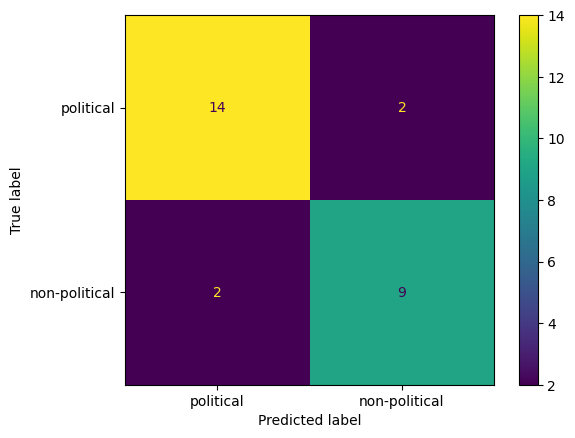

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the matrix
cm = confusion_matrix(y_test, preds, labels=["political", "non-political"])

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["political", "non-political"])
disp.plot()

### Accuracy
The model's accuracy is around **85%**

**Helper functions to classify articles in CSV file**

In [15]:
def classify_article(text, vectorizer, classifier):
    X = vectorizer.transform([text])
    prediction = classifier.predict(X)[0]
    return prediction

**Uses an article's QID to access the Wikidata description which will be used to classify the wiki article**

In [16]:
import requests, time

def get_wikidata_description(qid, retries=5):
    url = f"https://www.wikidata.org/wiki/Special:EntityData/{qid}.json"

    for attempt in range(retries):
        try:
            r = requests.get(url, timeout=10, headers={"User-Agent":"Student project"})
            if r.status_code == 200:
                data = r.json()
                ent = data.get("entities", {}).get(qid, {})
                return ent.get("descriptions", {}).get("en", {}).get("value", "empty")

        except:
            time.sleep(1 + attempt)

    return "empty"

### Adding two columns to each of the 5 CSV files: Description and Label

Classifying all of the articles in the CSV files that contain the top 10,000 articles throughout 2023 - 2024 by using the Naive Bayes classifier on the description of the articles utilizing the QID and wikidata.

**Australia**

In [17]:
import json
import os
import time

csv_file_path = 'top_australia.csv'
df = pd.read_csv(csv_file_path)

CACHE_FILE = "qid_cache_aus.json"

if os.path.exists(CACHE_FILE):
    qid_cache = json.load(open(CACHE_FILE))
else:
    qid_cache = {}

for qid in df["qid"].unique():

    if qid in qid_cache:
        continue

    description = get_wikidata_description(qid)

    if description == "empty":
        qid_cache[qid] = ("N/A", "No QID")
    else:
        label = classify_article(description, vectorizer, classifier)
        qid_cache[qid] = (description, label)

    json.dump(qid_cache, open(CACHE_FILE, "w"))

    time.sleep(0.1)


df["description"] = df["qid"].apply(lambda q: qid_cache[q][0])
df["label"] = df["qid"].apply(lambda q: qid_cache[q][1])

df.to_csv(csv_file_path, index=False)

**United States**

In [ ]:
csv_file_path = 'top_united_states.csv'
df = pd.read_csv(csv_file_path)

CACHE_FILE = "qid_cache_us.json"

if os.path.exists(CACHE_FILE):
    qid_cache = json.load(open(CACHE_FILE))
else:
    qid_cache = {}

for qid in df["qid"].unique():

    if qid in qid_cache:
        continue

    description = get_wikidata_description(qid)

    if description == "empty":
        qid_cache[qid] = ("N/A", "No QID")
    else:
        label = classify_article(description, vectorizer, classifier)
        qid_cache[qid] = (description, label)

    json.dump(qid_cache, open(CACHE_FILE, "w"))

    time.sleep(0.1)


df["description"] = df["qid"].apply(lambda q: qid_cache[q][0])
df["label"] = df["qid"].apply(lambda q: qid_cache[q][1])

df.to_csv(csv_file_path, index=False)

**Canada**

In [ ]:
csv_file_path = 'top_canada.csv'
df = pd.read_csv(csv_file_path)

CACHE_FILE = "qid_cache_canada.json"

if os.path.exists(CACHE_FILE):
    qid_cache = json.load(open(CACHE_FILE))
else:
    qid_cache = {}

for qid in df["qid"].unique():

    if qid in qid_cache:
        continue

    description = get_wikidata_description(qid)

    if description == "empty":
        qid_cache[qid] = ("N/A", "No QID")
    else:
        label = classify_article(description, vectorizer, classifier)
        qid_cache[qid] = (description, label)

    json.dump(qid_cache, open(CACHE_FILE, "w"))

    time.sleep(0.1)


df["description"] = df["qid"].apply(lambda q: qid_cache[q][0])
df["label"] = df["qid"].apply(lambda q: qid_cache[q][1])

df.to_csv(csv_file_path, index=False)

**India**

In [ ]:
csv_file_path = 'top_india.csv'
df = pd.read_csv(csv_file_path)

CACHE_FILE = "qid_cache_india.json"

if os.path.exists(CACHE_FILE):
    qid_cache = json.load(open(CACHE_FILE))
else:
    qid_cache = {}

for qid in df["qid"].unique():

    if qid in qid_cache:
        continue

    description = get_wikidata_description(qid)

    if description == "empty":
        qid_cache[qid] = ("N/A", "No QID")
    else:
        label = classify_article(description, vectorizer, classifier)
        qid_cache[qid] = (description, label)

    json.dump(qid_cache, open(CACHE_FILE, "w"))

    time.sleep(0.1)


df["description"] = df["qid"].apply(lambda q: qid_cache[q][0])
df["label"] = df["qid"].apply(lambda q: qid_cache[q][1])

df.to_csv(csv_file_path, index=False)

**United Kingdom**

In [40]:
csv_file_path = 'top_uk.csv'
df = pd.read_csv(csv_file_path)

CACHE_FILE = "qid_cache_uk.json"

if os.path.exists(CACHE_FILE):
    qid_cache = json.load(open(CACHE_FILE))
else:
    qid_cache = {}

for qid in df["qid"].unique():

    if qid in qid_cache:
        continue

    description = get_wikidata_description(qid)

    if description == "empty":
        qid_cache[qid] = ("N/A", "No QID")
    else:
        label = classify_article(description, vectorizer, classifier)
        qid_cache[qid] = (description, label)

    json.dump(qid_cache, open(CACHE_FILE, "w"))

    time.sleep(0.1)


df["description"] = df["qid"].apply(lambda q: qid_cache[q][0])
df["label"] = df["qid"].apply(lambda q: qid_cache[q][1])

df.to_csv(csv_file_path, index=False)